# Importing Libraries

In [ ]:
# load required modules
import shap
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import scipy.stats as stats

#statsmodels:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from statsmodels.stats.outliers_influence import OLSInfluence
from statsmodels.graphics.regressionplots import plot_leverage_resid2

# for regressions with scikit-learn:
import sklearn.linear_model as sklm
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, classification_report, precision_score, \
                            accuracy_score, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score

#scikit-learn:
import sklearn.linear_model as sklm
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score

# for KNN with scikit-learn:
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
!pip install dmba
from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score

from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score
from dmba import classificationSummary, gainsChart, liftChart

Colab environment detected.


In [ ]:
# Mounting Google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Cleaning


In [ ]:
## Ingest CSV Files for Los Angeles
los_angeles_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/704 Project/Datasets/USA/Los Angeles/los_Angeles_P1.csv')
los_angeles_data

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,109,https://www.airbnb.com/rooms/109,20240607021552,2024-06-07,city scrape,Amazing bright elegant condo park front *UPGRA...,"*** Unit upgraded with new bamboo flooring, ne...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,521,...,4.00,5.00,4.00,NaN,f,1,1,0,0,0.01
1,2708,https://www.airbnb.com/rooms/2708,20240607021552,2024-06-08,city scrape,Runyon Canyon | Beau Furn Mirror Mini-Suite Fi...,"Run Runyon Canyon, Our Gym & Sauna Open <br />...","Walk and run to Runyon Canyon, it is open!<br ...",https://a0.muscache.com/pictures/miso/Hosting-...,3008,...,4.98,4.95,4.88,NaN,t,2,0,2,0,0.34
2,24349,https://www.airbnb.com/rooms/24349,20240607021552,2024-06-07,city scrape,"The Wolford House, a Mid Century Hilltop Jewel",Gather for sun-dappled alfresco lunches at a s...,"Tucked away atop Mount Washington, the propert...",https://a0.muscache.com/pictures/819ea537-72c2...,98565,...,5.00,4.98,4.92,HSR21-002783,f,1,1,0,0,1.62
3,2732,https://www.airbnb.com/rooms/2732,20240607021552,2024-06-08,city scrape,Zen Life at the Beach,An oasis of tranquility awaits you.,"This is the best part of Santa Monica. Quiet, ...",https://a0.muscache.com/pictures/1082974/0f74c...,3041,...,4.48,4.91,4.22,228269,f,2,1,1,0,0.15
4,25670,https://www.airbnb.com/rooms/25670,20240607021552,2024-06-08,city scrape,Charming accommodations in Westwood/West LA,"Central, convenient, cozy 3room accommodations...","quiet, residential, safe, easy frwy access( (p...",https://a0.muscache.com/pictures/17748938/d583...,107370,...,4.95,4.84,4.37,Exempt - This listing is a bed and breakfast,f,1,1,0,0,0.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44679,1172800467497587416,https://www.airbnb.com/rooms/1172800467497587416,20240607021552,2024-06-07,city scrape,Quiet Echo Park Bungalow+PATIO,"Sweet semi - remodeled home, <br />your own p...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,409985549,...,NaN,NaN,NaN,NaN,f,23,23,0,0,NaN
44680,1172803234998373195,https://www.airbnb.com/rooms/1172803234998373195,20240607021552,2024-06-08,city scrape,Modern Villa On Sunset Plaza,NaN,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,347851048,...,NaN,NaN,NaN,HSR23-002920,t,22,22,0,0,NaN
44681,1172803419506137148,https://www.airbnb.com/rooms/1172803419506137148,20240607021552,2024-06-08,city scrape,stunning vila in central LA,Furniture has been changed and new photos on t...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,535105254,...,NaN,NaN,NaN,HSR23-001695,t,12,12,0,0,NaN
44682,1172819961651225254,https://www.airbnb.com/rooms/1172819961651225254,20240607021552,2024-06-08,city scrape,Hollywood Dreamscape,Experience Hollywood like never before from ou...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,425585404,...,NaN,NaN,NaN,HSR24-000035,t,3,3,0,0,NaN


In [ ]:
# Calculate the percentage of NaN values in each column
nan_percentage = los_angeles_data.isnull().sum() * 100 / len(los_angeles_data)

# Print columns with more than 20% NaN values
print("Columns with more than 20% NaN values:")
for column, percentage in nan_percentage.items():
  if percentage > 20:
    print(f"{column}: {percentage:.2f}%")

Columns with more than 20% NaN values:
neighborhood_overview: 46.65%
host_location: 23.62%
host_about: 45.50%
host_response_time: 21.85%
host_response_rate: 21.85%
host_acceptance_rate: 20.82%
host_neighbourhood: 21.61%
neighbourhood: 46.65%
calendar_updated: 100.00%
first_review: 27.11%
last_review: 27.11%
review_scores_rating: 27.11%
review_scores_accuracy: 27.20%
review_scores_cleanliness: 27.20%
review_scores_checkin: 27.22%
review_scores_communication: 27.21%
review_scores_location: 27.22%
review_scores_value: 27.23%
license: 71.38%
reviews_per_month: 27.11%


In [ ]:
# Drop columns with more than 30% NaN values
threshold = 0.30
los_angeles_data = los_angeles_data.dropna(thresh=len(los_angeles_data) * (1 - threshold), axis=1)

# Print the updated DataFrame
los_angeles_data.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'picture_url', 'host_id', 'host_url', 'host_name',
       'host_since', 'host_location', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'has_availability', 'availability_30',
       'availability_60', '

In [ ]:
# Calculate the number of rows with at least one NaN value
rows_with_nan = los_angeles_data.isnull().any(axis=1).sum()

print(f"Number of rows with at least one NaN value: {rows_with_nan}")

Number of rows with at least one NaN value: 29248


In [ ]:
## We have identfied some non useful columns like listing id and description to drop first

In [ ]:
not_useful_columns = [
    'id','source','name','description',
    'host_id','host_name','host_url','host_thumbnail_url','host_picture_url',
    'latitude','longitude', 'scrape_id', 'last_scraped', 'listing_url', 'picture_url',
    'calendar_last_scraped','host_location','host_since','first_review','last_review']

In [ ]:
## Identifing categorical variables with more than 10 cateogries
categorical_variables_with_more_categories = ['host_neighbourhood','amenities',
                                                'host_verifications',
                                                'bathrooms_text','property_type']

In [ ]:
## Drop not useful variables

In [ ]:
los_angeles_data = los_angeles_data.drop(columns=not_useful_columns, errors='ignore')
los_angeles_data

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,within an hour,100.0,100.0,t,Hollywood,2.0,3.0,"['email', 'phone']",t,t,...,5.00,4.98,4.95,4.88,t,2,0,2,0,0.34
2,within an hour,100.0,50.0,f,Santa Monica,2.0,2.0,"['email', 'phone']",t,t,...,4.39,4.48,4.91,4.22,f,2,1,1,0,0.15
3,within a few hours,100.0,100.0,t,Culver City,1.0,4.0,"['email', 'phone']",t,t,...,4.97,4.94,4.97,4.72,f,1,0,1,0,1.25
4,within an hour,100.0,100.0,t,Hollywood,2.0,3.0,"['email', 'phone']",t,t,...,4.90,4.90,4.70,4.73,t,2,0,2,0,0.18
5,within an hour,100.0,97.0,t,Culver City,5.0,11.0,"['email', 'phone', 'work_email']",t,t,...,4.99,4.99,4.89,4.80,f,1,1,0,0,1.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19422,within an hour,100.0,96.0,t,Central LA,12.0,23.0,"['email', 'phone']",t,t,...,5.00,5.00,5.00,5.00,f,11,11,0,0,2.00
19423,within an hour,100.0,99.0,f,East Village,3.0,4.0,"['email', 'phone']",t,t,...,4.00,4.00,4.00,4.00,t,3,3,0,0,1.00
19424,within an hour,100.0,93.0,t,South Los Angeles,59.0,177.0,['phone'],t,t,...,5.00,5.00,5.00,5.00,f,31,31,0,0,1.00
19426,within an hour,100.0,100.0,t,Tropico,4.0,5.0,['phone'],t,t,...,5.00,5.00,5.00,5.00,t,4,4,0,0,3.00


In [ ]:
## Drop any row with more than 1 null values

In [ ]:
los_angeles_data.dropna(inplace=True)
los_angeles_data.reset_index(drop=True, inplace=True)
los_angeles_data

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,within an hour,100.0,100.0,t,Hollywood,2.0,3.0,"['email', 'phone']",t,t,...,5.00,4.98,4.95,4.88,t,2,0,2,0,0.34
1,within an hour,100.0,50.0,f,Santa Monica,2.0,2.0,"['email', 'phone']",t,t,...,4.39,4.48,4.91,4.22,f,2,1,1,0,0.15
2,within a few hours,100.0,100.0,t,Culver City,1.0,4.0,"['email', 'phone']",t,t,...,4.97,4.94,4.97,4.72,f,1,0,1,0,1.25
3,within an hour,100.0,100.0,t,Hollywood,2.0,3.0,"['email', 'phone']",t,t,...,4.90,4.90,4.70,4.73,t,2,0,2,0,0.18
4,within an hour,100.0,97.0,t,Culver City,5.0,11.0,"['email', 'phone', 'work_email']",t,t,...,4.99,4.99,4.89,4.80,f,1,1,0,0,1.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10353,within an hour,100.0,96.0,t,Central LA,12.0,23.0,"['email', 'phone']",t,t,...,5.00,5.00,5.00,5.00,f,11,11,0,0,2.00
10354,within an hour,100.0,99.0,f,East Village,3.0,4.0,"['email', 'phone']",t,t,...,4.00,4.00,4.00,4.00,t,3,3,0,0,1.00
10355,within an hour,100.0,93.0,t,South Los Angeles,59.0,177.0,['phone'],t,t,...,5.00,5.00,5.00,5.00,f,31,31,0,0,1.00
10356,within an hour,100.0,100.0,t,Tropico,4.0,5.0,['phone'],t,t,...,5.00,5.00,5.00,5.00,t,4,4,0,0,3.00


In [ ]:
# Converting object variables to int/float by stripping out % and $ symbols

def process_data(df):
  # Process host_response_rate
  df['host_response_rate'] = df['host_response_rate'].astype(str).str.rstrip('%').astype(float)

  # Process host_acceptance_rate
  df['host_acceptance_rate'] = df['host_acceptance_rate'].astype(str).str.rstrip('%').astype(float)

  # Process price
  df['price'] = df['price'].astype(str).str.replace(r'[$,]', '', regex=True).astype(float)
  return df


los_angeles_data = process_data(los_angeles_data)
los_angeles_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10358 entries, 0 to 10357
Data columns (total 50 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   host_response_time                            10358 non-null  object 
 1   host_response_rate                            10358 non-null  float64
 2   host_acceptance_rate                          10358 non-null  float64
 3   host_is_superhost                             10358 non-null  object 
 4   host_neighbourhood                            10358 non-null  object 
 5   host_listings_count                           10358 non-null  float64
 6   host_total_listings_count                     10358 non-null  float64
 7   host_verifications                            10358 non-null  object 
 8   host_has_profile_pic                          10358 non-null  object 
 9   host_identity_verified                        10358 non-null 

In [ ]:
top_neighborhoods = los_angeles_data['neighbourhood_cleansed'].value_counts().head(25).index

top_neighborhoods_data = los_angeles_data[los_angeles_data['neighbourhood_cleansed'].isin(top_neighborhoods)]
top_neighborhoods_data['neighbourhood_cleansed'].unique()

array(['Hollywood', 'Santa Monica', 'Culver City', 'Venice',
       'Silver Lake', 'Redondo Beach', 'Hollywood Hills', 'Mid-City',
       'Glendale', 'Pasadena', 'West Hollywood', 'Mid-Wilshire',
       'Woodland Hills', 'North Hollywood', 'Topanga', 'Beverly Hills',
       'Hollywood Hills West', 'Long Beach', 'Burbank', 'Malibu',
       'Alhambra', 'Sherman Oaks', 'Downtown', 'Westlake',
       'Beverly Grove'], dtype=object)

In [ ]:
top_neighborhoods_data

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,within an hour,100.0,100.0,t,Hollywood,2.0,3.0,"['email', 'phone']",t,t,...,5.00,4.98,4.95,4.88,t,2,0,2,0,0.34
1,within an hour,100.0,50.0,f,Santa Monica,2.0,2.0,"['email', 'phone']",t,t,...,4.39,4.48,4.91,4.22,f,2,1,1,0,0.15
2,within a few hours,100.0,100.0,t,Culver City,1.0,4.0,"['email', 'phone']",t,t,...,4.97,4.94,4.97,4.72,f,1,0,1,0,1.25
3,within an hour,100.0,100.0,t,Hollywood,2.0,3.0,"['email', 'phone']",t,t,...,4.90,4.90,4.70,4.73,t,2,0,2,0,0.18
4,within an hour,100.0,97.0,t,Culver City,5.0,11.0,"['email', 'phone', 'work_email']",t,t,...,4.99,4.99,4.89,4.80,f,1,1,0,0,1.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10353,within an hour,100.0,96.0,t,Central LA,12.0,23.0,"['email', 'phone']",t,t,...,5.00,5.00,5.00,5.00,f,11,11,0,0,2.00
10354,within an hour,100.0,99.0,f,East Village,3.0,4.0,"['email', 'phone']",t,t,...,4.00,4.00,4.00,4.00,t,3,3,0,0,1.00
10355,within an hour,100.0,93.0,t,South Los Angeles,59.0,177.0,['phone'],t,t,...,5.00,5.00,5.00,5.00,f,31,31,0,0,1.00
10356,within an hour,100.0,100.0,t,Tropico,4.0,5.0,['phone'],t,t,...,5.00,5.00,5.00,5.00,t,4,4,0,0,3.00


In [ ]:
los_angeles_data = top_neighborhoods_data

In [ ]:
#create a dataframe of los_angeles_data by dropping the variables in categorical_variables_with_more_categories

los_angeles_data_for_linear_regression = los_angeles_data.drop(columns=categorical_variables_with_more_categories, errors='ignore')
los_angeles_data_for_linear_regression.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10358 entries, 0 to 10357
Data columns (total 45 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   host_response_time                            10358 non-null  object 
 1   host_response_rate                            10358 non-null  float64
 2   host_acceptance_rate                          10358 non-null  float64
 3   host_is_superhost                             10358 non-null  object 
 4   host_listings_count                           10358 non-null  float64
 5   host_total_listings_count                     10358 non-null  float64
 6   host_has_profile_pic                          10358 non-null  object 
 7   host_identity_verified                        10358 non-null  object 
 8   neighbourhood_cleansed                        10358 non-null  object 
 9   neighbourhood_group_cleansed                  10358 non-null 

# Variable Selection

In [ ]:
# Converting object type variables (host_response_time, neighbourhood_group_cleansed, room_type ) into dummy
x = pd.get_dummies(los_angeles_data_for_linear_regression, drop_first=True)
x.drop(columns=['price'], inplace=True)
y = los_angeles_data_for_linear_regression['price']
x

,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,...,neighbourhood_cleansed_West Hollywood,neighbourhood_cleansed_Westlake,neighbourhood_cleansed_Woodland Hills,neighbourhood_group_cleansed_Other Cities,neighbourhood_group_cleansed_Unincorporated Areas,room_type_Hotel room,room_type_Private room,room_type_Shared room,has_availability_t,instant_bookable_t
0,100.0,100.0,2.0,3.0,1,1.0,1.0,1.0,30,550,...,False,False,False,False,False,False,True,False,True,True
1,100.0,50.0,2.0,2.0,1,1.0,1.0,0.0,7,27,...,False,False,False,True,False,False,True,False,True,False
2,100.0,100.0,1.0,4.0,1,1.0,1.0,0.0,1,21,...,False,False,False,True,False,False,True,False,True,False
3,100.0,100.0,2.0,3.0,1,1.0,1.0,1.0,30,500,...,False,False,False,False,False,False,True,False,True,True
4,100.0,97.0,5.0,11.0,3,1.0,2.0,2.0,3,30,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10353,100.0,96.0,12.0,23.0,2,1.0,1.0,0.0,1,25,...,False,False,False,False,False,False,False,False,True,False
10354,100.0,99.0,3.0,4.0,8,2.0,2.0,2.0,1,365,...,False,False,False,True,False,False,False,False,True,True
10355,100.0,93.0,59.0,177.0,4,2.0,2.0,2.0,2,27,...,False,False,False,True,False,False,False,False,True,False
10356,100.0,100.0,4.0,5.0,3,1.0,1.0,1.0,1,365,...,False,False,False,True,False,False,False,False,True,True


In [ ]:
## Replace boolean with integer

In [ ]:
# Iterate through each column in the DataFrame
for col in x.columns:
    # Check if the column's data type is boolean
    if pd.api.types.is_bool_dtype(x[col]):
        # Replace True with 1 and False with 0
        x[col] = x[col].astype(int)
x

,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,...,neighbourhood_cleansed_West Hollywood,neighbourhood_cleansed_Westlake,neighbourhood_cleansed_Woodland Hills,neighbourhood_group_cleansed_Other Cities,neighbourhood_group_cleansed_Unincorporated Areas,room_type_Hotel room,room_type_Private room,room_type_Shared room,has_availability_t,instant_bookable_t
0,100.0,100.0,2.0,3.0,1,1.0,1.0,1.0,30,550,...,0,0,0,0,0,0,1,0,1,1
1,100.0,50.0,2.0,2.0,1,1.0,1.0,0.0,7,27,...,0,0,0,1,0,0,1,0,1,0
2,100.0,100.0,1.0,4.0,1,1.0,1.0,0.0,1,21,...,0,0,0,1,0,0,1,0,1,0
3,100.0,100.0,2.0,3.0,1,1.0,1.0,1.0,30,500,...,0,0,0,0,0,0,1,0,1,1
4,100.0,97.0,5.0,11.0,3,1.0,2.0,2.0,3,30,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10353,100.0,96.0,12.0,23.0,2,1.0,1.0,0.0,1,25,...,0,0,0,0,0,0,0,0,1,0
10354,100.0,99.0,3.0,4.0,8,2.0,2.0,2.0,1,365,...,0,0,0,1,0,0,0,0,1,1
10355,100.0,93.0,59.0,177.0,4,2.0,2.0,2.0,2,27,...,0,0,0,1,0,0,0,0,1,0
10356,100.0,100.0,4.0,5.0,3,1.0,1.0,1.0,1,365,...,0,0,0,1,0,0,0,0,1,1


In [ ]:
## We are using 75% data for training and 25% data for model validation

In [ ]:
train_x, valid_x, train_y, valid_y = train_test_split(x, y, test_size=0.25, random_state=1)

## Forward Selection


In [ ]:
## We use forward selection to identify most important variables for price prediction

In [ ]:
def train_model(variables):
    if len(variables) == 0:
        return None
    model = sklm.LinearRegression()
    model.fit(train_x[variables], train_y)
    return model

def score_model(model, variables):
    if len(variables) == 0:
        return AIC_score(train_y, [train_y.mean()] * len(train_y), model, df=1)

    return AIC_score(train_y, model.predict(train_x[variables]), model)

best_model, best_variables = forward_selection(train_x.columns, train_model, score_model, verbose=True)

print(best_variables)

Variables: host_response_rate, host_acceptance_rate, host_listings_count, host_total_listings_count, accommodates, bathrooms, bedrooms, beds, minimum_nights, maximum_nights, minimum_minimum_nights, maximum_minimum_nights, minimum_maximum_nights, maximum_maximum_nights, minimum_nights_avg_ntm, maximum_nights_avg_ntm, availability_30, availability_60, availability_90, availability_365, number_of_reviews, number_of_reviews_ltm, number_of_reviews_l30d, review_scores_rating, review_scores_accuracy, review_scores_cleanliness, review_scores_checkin, review_scores_communication, review_scores_location, review_scores_value, calculated_host_listings_count, calculated_host_listings_count_entire_homes, calculated_host_listings_count_private_rooms, calculated_host_listings_count_shared_rooms, reviews_per_month, host_response_time_within a day, host_response_time_within a few hours, host_response_time_within an hour, host_is_superhost_t, host_has_profile_pic_t, host_identity_verified_t, neighbourhoo

In [ ]:
## We identified 40 best variables using forward selection

In [ ]:
len(best_variables)

40

# Linear Regression

In [ ]:
X=sm.add_constant(train_x[best_variables].astype(float))
y=train_y
model1 = sm.OLS(y, X)
results1 = model1.fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.383
Model:                            OLS   Adj. R-squared:                  0.380
Method:                 Least Squares   F-statistic:                     120.0
Date:                Tue, 03 Dec 2024   Prob (F-statistic):               0.00
Time:                        01:40:51   Log-Likelihood:                -58170.
No. Observations:                7768   AIC:                         1.164e+05
Df Residuals:                    7727   BIC:                         1.167e+05
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                         -360.2041     95.850     -3.758      0.000    -548.095    -172.313
bathrooms                                      157.6828      7.044     22.384      0.000     143.874     171.492
neighbourhood_cleansed_Malibu                  613.2747     33.066     18.547      0.000     548.456     678.094
neighbourhood_cleansed_Hollywood Hills West    323.5768     31.592     10.242      0.000     261.648     385.505
bedrooms                                        50.2369      5.989      8.388      0.000      38.496      61.978
availability_30                                  4.0088      0.820      4.888      0.000       2.401       5.617
maximum_nights                                   0.0158      0.015      1.039      0.299      -0.014       0.045
review_scores_cleanliness                       89.9081     21.967      4.093      0.000      46.847     132.969
review_scores_checkin                          -86.4356     20.836     -4.148      0.000    -127.281     -45.591
review_scores_location                          65.9642     20.919      3.153      0.002      24.957     106.972
review_scores_value                            -90.4176     23.536     -3.842      0.000    -136.555     -44.281
host_is_superhost_t                            -26.2219     11.321     -2.316      0.021     -48.414      -4.029
review_scores_rating                           117.5016     31.360      3.747      0.000      56.028     178.976
review_scores_accuracy                         -24.8837     27.894     -0.892      0.372     -79.564      29.796
minimum_nights                                  -1.0501      0.344     -3.057      0.002      -1.724      -0.377
reviews_per_month                              -11.9699      3.426     -3.494      0.000     -18.686      -5.253
neighbourhood_cleansed_Venice                   69.5071     18.515      3.754      0.000      33.214     105.801
neighbourhood_cleansed_Pasadena                 51.1088     25.745      1.985      0.047       0.641     101.577
neighbourhood_cleansed_West Hollywood           77.4496     21.426      3.615      0.000      35.449     119.450
host_total_listings_count                        0.8668      0.072     11.985      0.000       0.725       1.009
host_listings_count                             -1.0491      0.086    -12.174      0.000      -1.218      -0.880
calculated_host_listings_count_private_rooms  -152.6642      6.800    -22.452      0.000    -165.993    -139.335
neighbourhood_cleansed_Westlake                -75.9409     34.389     -2.208      0.027    -143.352      -8.530
neighbourhood_cleansed_Beverly Hills            89.0490     24.784      3.593      0.000      40.466     137.632
neighbourhood_cleansed_Santa Mon

## Multi-collinearity check

In [ ]:
!pip install statsmodels
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

best_variables = train_x.columns

# Add a constant to the predictors for the OLS model
#X = sm.add_constant(train_x[best_variables].astype(float))

X =train_x[best_variables]

# Calculate VIF for each variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the VIF scores
print(vif_data)

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                     Variable        VIF
0          host_response_rate   4.493626
1        host_acceptance_rate   1.532152
2         host_listings_count  98.087216
3   host_total_listings_count  76.651351
4                accommodates   5.101538
..                        ...        ...
67       room_type_Hotel room   1.565796
68     room_type_Private room   1.437064
69      room_type_Shared room   2.308443
70         has_availability_t   1.004976
71         instant_bookable_t   1.243381

[72 rows x 2 columns]


In [ ]:
## Remove VIF > 10

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming X and y are defined as in the previous code
def remove_multicollinearity(X, y):
    while True:
        vif_data = pd.DataFrame()
        vif_data["feature"] = X.columns
        vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

        max_vif = vif_data["VIF"].max()
        if max_vif < 10:
            break

        drop_column = vif_data[vif_data["VIF"] == max_vif]["feature"].iloc[0]
        print(f"Dropping column: {drop_column} due to VIF of {max_vif:.2f}")
        X = X.drop(columns=drop_column)

        if len(X.columns) == 0:  # Check for empty dataframe after dropping
            print("Error: All columns removed due to multicollinearity")
            return X,y #return empty X,y

    return X, y



X, y = remove_multicollinearity(X, y)
train_x = X

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Dropping column: neighbourhood_cleansed_Topanga due to VIF of inf
Dropping column: calculated_host_listings_count due to VIF of 10751.82
Dropping column: neighbourhood_group_cleansed_Other Cities due to VIF of 4403.63
Dropping column: review_scores_rating due to VIF of 1018.41
Dropping column: review_scores_accuracy due to VIF of 658.59
Dropping column: review_scores_communication due to VIF of 589.54
Dropping column: has_availability_t due to VIF of 524.13
Dropping column: review_scores_location due to VIF of 376.93
Dropping column: review_scores_cleanliness due to VIF of 355.52
Dropping column: host_response_rate due to VIF of 335.05
Dropping column: maximum_nights_avg_ntm due to VIF of 329.99
Dropping column: review_scores_checkin due to VIF of 290.26
Dropping column: review_scores_value due to VIF of 93.22
Dropping column: host_listings_count due to VIF of 91.52
Dropping column: host_has_profile_pic_t due to VIF of 67.13
Dropping column: availability_60 due to VIF of 65.33
Dropping

In [ ]:
# save the vif<10 variables above into best_variables_lowVIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

best_variables_lowVIF = list(train_x.columns)

print("Final variables after VIF reduction:")
best_variables_lowVIF

Final variables after VIF reduction:


['host_total_listings_count',
 'bathrooms',
 'bedrooms',
 'beds',
 'minimum_nights',
 'maximum_nights',
 'maximum_minimum_nights',
 'minimum_maximum_nights',
 'minimum_nights_avg_ntm',
 'availability_30',
 'availability_365',
 'number_of_reviews',
 'number_of_reviews_ltm',
 'number_of_reviews_l30d',
 'calculated_host_listings_count_private_rooms',
 'calculated_host_listings_count_shared_rooms',
 'reviews_per_month',
 'host_response_time_within a day',
 'host_response_time_within a few hours',
 'host_is_superhost_t',
 'neighbourhood_cleansed_Beverly Grove',
 'neighbourhood_cleansed_Beverly Hills',
 'neighbourhood_cleansed_Burbank',
 'neighbourhood_cleansed_Culver City',
 'neighbourhood_cleansed_Downtown',
 'neighbourhood_cleansed_Glendale',
 'neighbourhood_cleansed_Hollywood',
 'neighbourhood_cleansed_Hollywood Hills',
 'neighbourhood_cleansed_Hollywood Hills West',
 'neighbourhood_cleansed_Long Beach',
 'neighbourhood_cleansed_Malibu',
 'neighbourhood_cleansed_Mid-City',
 'neighbourhoo

In [ ]:
## Rerun regression with low vif variables

X = sm.add_constant(train_x[best_variables_lowVIF].astype(float))
y = train_y

model_lowVIF = sm.OLS(y, X)
results_lowVIF = model_lowVIF.fit()
print(results_lowVIF.summary())

y_pred = results_lowVIF.predict(X)

regressionSummary(y, y_pred)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     64.90
Date:                Tue, 03 Dec 2024   Prob (F-statistic):               0.00
Time:                        01:45:07   Log-Likelihood:                -58730.
No. Observations:                7768   AIC:                         1.176e+05
Df Residuals:                    7719   BIC:                         1.179e+05
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                                                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

## Non Normality Check

In [ ]:
## Non Normality Check

In [ ]:
residuals=results_lowVIF .resid
# residuals=advertising.Sales-advertising.predicted_sales #manual calculation

In [ ]:
!pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt

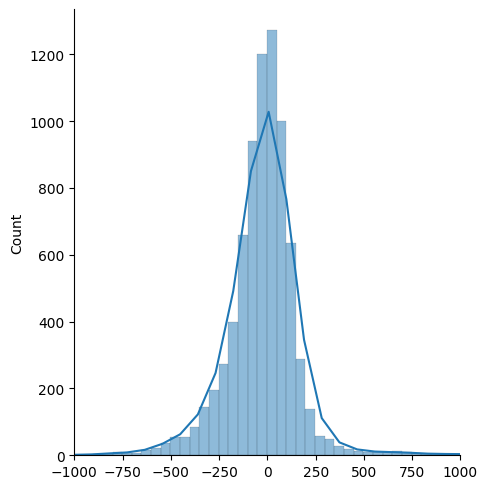

In [ ]:
sns.displot(residuals, binwidth=50, kde=True, kind="hist").set(xlim=(-1000, 1000))

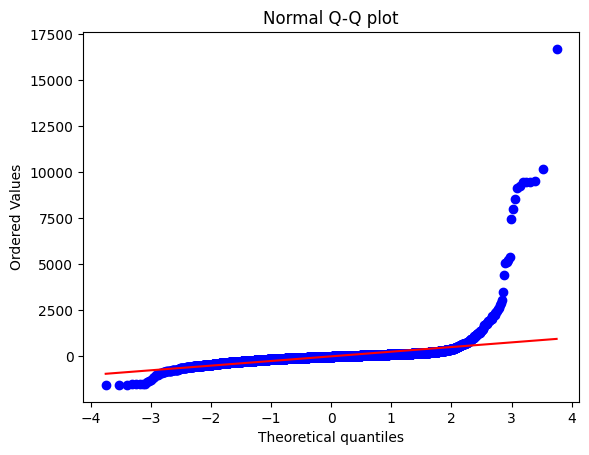

Shapiro-Wilk test p-value: 3.144820519358913e-99


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7768.
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
# Check for Normality of Residuals
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

# Shapiro-Wilk test for normality
_, p_value_shapiro = stats.shapiro(residuals)
print(f"Shapiro-Wilk test p-value: {p_value_shapiro}")

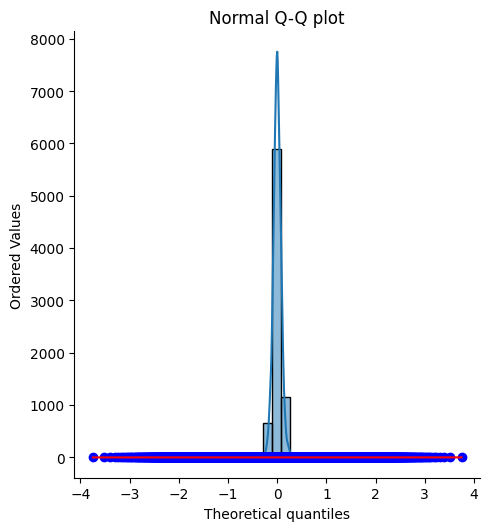

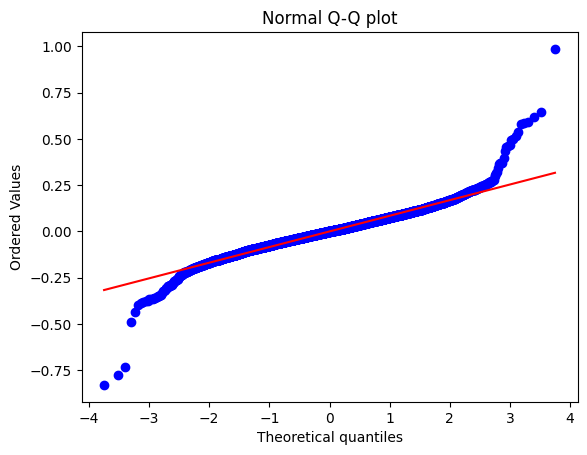

Shapiro-Wilk test p-value (Box-Cox transformed): 1.7034044012678925e-45


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7768.
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
from scipy.stats import boxcox

# Apply Box-Cox transformation to the response variable
y_transformed, lambda_val = boxcox(y)

# Fit the OLS model with the transformed response variable
model_boxcox = sm.OLS(y_transformed, X)
results_boxcox = model_boxcox.fit()

# Get the residuals of the transformed model
residuals_boxcox = results_boxcox.resid

# Visualize the distribution of the residuals
sns.displot(residuals_boxcox, bins=10, kde=True, kind="hist")
stats.probplot(residuals_boxcox, dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

stats.probplot(residuals_boxcox, dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

# Perform Shapiro-Wilk test for normality
_, p_value_shapiro_boxcox = stats.shapiro(residuals_boxcox)
print(f"Shapiro-Wilk test p-value (Box-Cox transformed): {p_value_shapiro_boxcox}")

## Heteroskedacity check

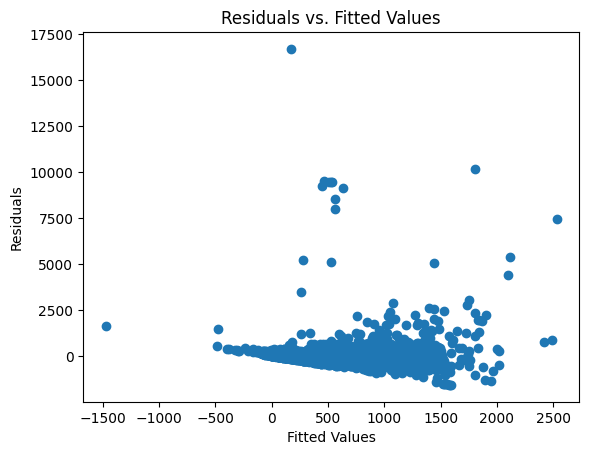

Breusch-Pagan test p-value: 9.374520228082482e-185


In [ ]:
plt.scatter(results_lowVIF .fittedvalues, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.show()

# Breusch-Pagan test for Heteroscedasticity
_, p_value, _, _ = sms.het_breuschpagan(residuals, model1.exog)
print(f"Breusch-Pagan test p-value: {p_value}")

In [ ]:
## Breusch-Pagan test p-value is less than 0.05, hence we have a heteroskedacity problem

In [ ]:
# Robust Regression to account for heteroskedacity
X = sm.add_constant(train_x[best_variables_lowVIF].astype(float))
y = train_y

model_robust = sm.OLS(y, X)
results_robust = model_robust.fit(cov_type='HC3')

print(results_robust.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     45.07
Date:                Tue, 03 Dec 2024   Prob (F-statistic):               0.00
Time:                        01:46:02   Log-Likelihood:                -58730.
No. Observations:                7768   AIC:                         1.176e+05
Df Residuals:                    7719   BIC:                         1.179e+05
Df Model:                          48                                         
Covariance Type:                  HC3                                         
                                                        coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------

In [ ]:
# remove the variable with P-value >0.05 from lowVIF variables

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import pandas as pd

# Get p-values for each variable
p_values = results_lowVIF.pvalues[1:]  # Exclude the intercept

# Identify variables with p-value > 0.05
variables_to_remove = list(p_values[p_values > 0.05].index)

# Remove these variables from best_variables_lowVIF
updated_variables = [var for var in best_variables_lowVIF if var not in variables_to_remove]

print("Variables removed due to p-value > 0.05:", variables_to_remove)

# Refit the model with the updated variables
if updated_variables:
  X = sm.add_constant(train_x[updated_variables].astype(float))
  model_updated = sm.OLS(y, X)
  results_updated = model_updated.fit()
  print(results_updated.summary())
else:
  print("No variables remaining after p-value filtering")
len(updated_variables)

Variables removed due to p-value > 0.05: ['beds', 'minimum_nights_avg_ntm', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'neighbourhood_cleansed_Beverly Grove', 'neighbourhood_cleansed_Culver City', 'neighbourhood_cleansed_Downtown', 'neighbourhood_cleansed_Glendale', 'neighbourhood_cleansed_Hollywood', 'neighbourhood_cleansed_Mid-City', 'neighbourhood_cleansed_Mid-Wilshire', 'neighbourhood_cleansed_North Hollywood', 'neighbourhood_cleansed_Redondo Beach', 'neighbourhood_cleansed_Sherman Oaks', 'neighbourhood_cleansed_Westlake', 'neighbourhood_cleansed_Woodland Hills', 'room_type_Hotel room', 'room_type_Private room', 'room_type_Shared room', 'instant_bookable_t']
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.285
Model:                     

24

# Compare Ensemble models and Regression models

In [ ]:
## Create a regression prediction model using sckit updated variables

In [ ]:
# Prepare data for models
X_train_updated = train_x[updated_variables]
X_valid_updated = valid_x[updated_variables]


#model specification
ski_reg=sklm.LinearRegression()
ski_reg.fit(X_train_updated, train_y)

LinearRegression()

In [ ]:
ski_reg_predictions=ski_reg.predict(X_valid_updated) # predictions for validation set

In [ ]:
regressionSummary(valid_y,ski_reg_predictions)


Regression statistics

                      Mean Error (ME) : 14.8510
       Root Mean Squared Error (RMSE) : 608.7979
            Mean Absolute Error (MAE) : 161.2139
          Mean Percentage Error (MPE) : -26.1492
Mean Absolute Percentage Error (MAPE) : 68.8647


In [ ]:
rmse_reg = np.sqrt(mean_squared_error(valid_y, ski_reg_predictions))
rmse_reg

608.7978709915956

In [ ]:
## Build price prediction models using ensemble methods (Random Forest, Bagging, and Boosting)

In [ ]:
len(los_angeles_data.columns)

50

In [ ]:
updated_variables

['host_total_listings_count',
 'bathrooms',
 'bedrooms',
 'minimum_nights',
 'maximum_nights',
 'maximum_minimum_nights',
 'minimum_maximum_nights',
 'availability_30',
 'reviews_per_month',
 'host_response_time_within a day',
 'host_response_time_within a few hours',
 'host_is_superhost_t',
 'neighbourhood_cleansed_Beverly Hills',
 'neighbourhood_cleansed_Burbank',
 'neighbourhood_cleansed_Hollywood Hills',
 'neighbourhood_cleansed_Hollywood Hills West',
 'neighbourhood_cleansed_Long Beach',
 'neighbourhood_cleansed_Malibu',
 'neighbourhood_cleansed_Pasadena',
 'neighbourhood_cleansed_Santa Monica',
 'neighbourhood_cleansed_Silver Lake',
 'neighbourhood_cleansed_Venice',
 'neighbourhood_cleansed_West Hollywood',
 'neighbourhood_group_cleansed_Unincorporated Areas']

In [ ]:
## Add categorical variables to updated variables list, and split data into training and dummy

# Converting object type variables (host_response_time, neighbourhood_group_cleansed, room_type ) into dummy

#x = pd.get_dummies(los_angeles_data, drop_first=True)
los_angeles_data_predictors = los_angeles_data[[
                     'host_verifications',
                     'neighbourhood_cleansed',
                     'property_type',
                     'host_total_listings_count',
                     'bathrooms',
                     'beds',
                     'minimum_nights',
                     'maximum_nights',
                     'maximum_minimum_nights',
                     'availability_30',
                     'calculated_host_listings_count_entire_homes',
                     'calculated_host_listings_count_private_rooms',
                     'calculated_host_listings_count_shared_rooms',
                     'reviews_per_month',
                     'neighbourhood_group_cleansed',
                     'room_type',
                     'instant_bookable']]

x = pd.get_dummies(los_angeles_data_predictors, drop_first=True)
y = los_angeles_data['price']


In [ ]:
# Iterate through each column in the DataFrame
for col in x.columns:
    # Check if the column's data type is boolean
    if pd.api.types.is_bool_dtype(x[col]):
        # Replace True with 1 and False with 0
        x[col] = x[col].astype(int)
x

,host_total_listings_count,bathrooms,beds,minimum_nights,maximum_nights,maximum_minimum_nights,availability_30,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,...,property_type_Shipping container,property_type_Tiny home,property_type_Treehouse,property_type_Yurt,neighbourhood_group_cleansed_Other Cities,neighbourhood_group_cleansed_Unincorporated Areas,room_type_Hotel room,room_type_Private room,room_type_Shared room,instant_bookable_t
0,3.0,1.0,1.0,30,550,30,8,0,2,0,...,0,0,0,0,0,0,0,1,0,1
1,2.0,1.0,0.0,7,27,7,0,1,1,0,...,0,0,0,0,1,0,0,1,0,0
2,4.0,1.0,0.0,1,21,1,11,0,1,0,...,0,0,0,0,1,0,0,1,0,0
3,3.0,1.0,1.0,30,500,30,5,0,2,0,...,0,0,0,0,0,0,0,1,0,1
4,11.0,1.0,2.0,3,30,4,2,1,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10353,23.0,1.0,0.0,1,25,1,15,11,0,0,...,0,0,0,0,0,0,0,0,0,0
10354,4.0,2.0,2.0,1,365,1,15,3,0,0,...,0,0,0,0,1,0,0,0,0,1
10355,177.0,2.0,2.0,2,27,2,15,31,0,0,...,0,0,0,0,1,0,0,0,0,0
10356,5.0,1.0,1.0,1,365,1,6,4,0,0,...,0,0,0,0,1,0,0,0,0,1


In [ ]:
train_x, valid_x, train_y, valid_y = train_test_split(x, y, test_size=0.25, random_state=1)

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# 2. Random Forest (using updated_variables + categorical variables)
model_rf = RandomForestRegressor(max_features=10, random_state=23)
model_rf.fit(train_x, train_y)
y_pred_rf = model_rf.predict(valid_x)
rmse_rf = np.sqrt(mean_squared_error(valid_y, y_pred_rf))

# 3. Gradient Boosting (using updated_variables + categorical variables)
model_gb = GradientBoostingRegressor(n_estimators=500, learning_rate=0.01, random_state=23)
model_gb.fit(train_x, train_y)
y_pred_gb = model_gb.predict(valid_x)
rmse_gb = np.sqrt(mean_squared_error(valid_y, y_pred_gb))

# 4. Bagging (using updated_variables + categorical variables)
model_bag = RandomForestRegressor(max_features=101, random_state=23)
model_bag.fit(train_x, train_y)
y_pred_bag = model_bag.predict(valid_x)
rmse_bag = np.sqrt(mean_squared_error(valid_y, y_pred_bag))


print("Model\t\tRMSE")
print(f"Linear Regression\t{rmse_reg:.4f}")
print(f"Random Forest\t\t{rmse_rf:.4f}")
print(f"Gradient Boosting\t{rmse_gb:.4f}")
print(f"Bagging\t\t{rmse_bag:.4f}")

Model		RMSE
Linear Regression	608.7979
Random Forest		468.0233
Gradient Boosting	550.4026
Bagging		476.1613


In [ ]:
## Random Forest has the lowest RMSE, so we analyse it further using Shapley and variable importance

## Variable Importance

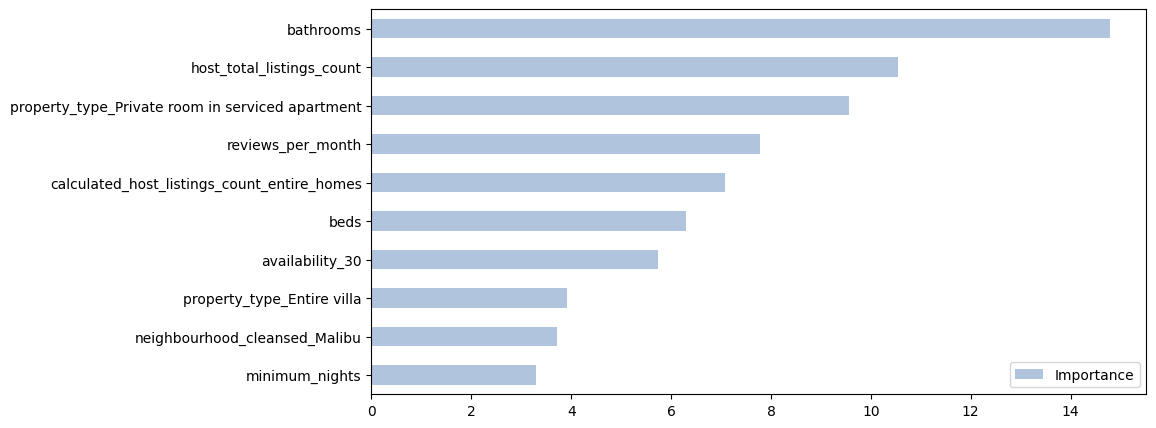

In [ ]:
x_variables = train_x.columns.tolist()

Importance = pd.DataFrame({'Importance': model_rf.feature_importances_ * 100}, index=x_variables)

top_10_importance = Importance.sort_values('Importance', ascending=False).head(10)
top_10_importance

top_10_importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='lightsteelblue')
plt.gcf().set_size_inches(10, 5)
plt.show()

## Shapley Analysis

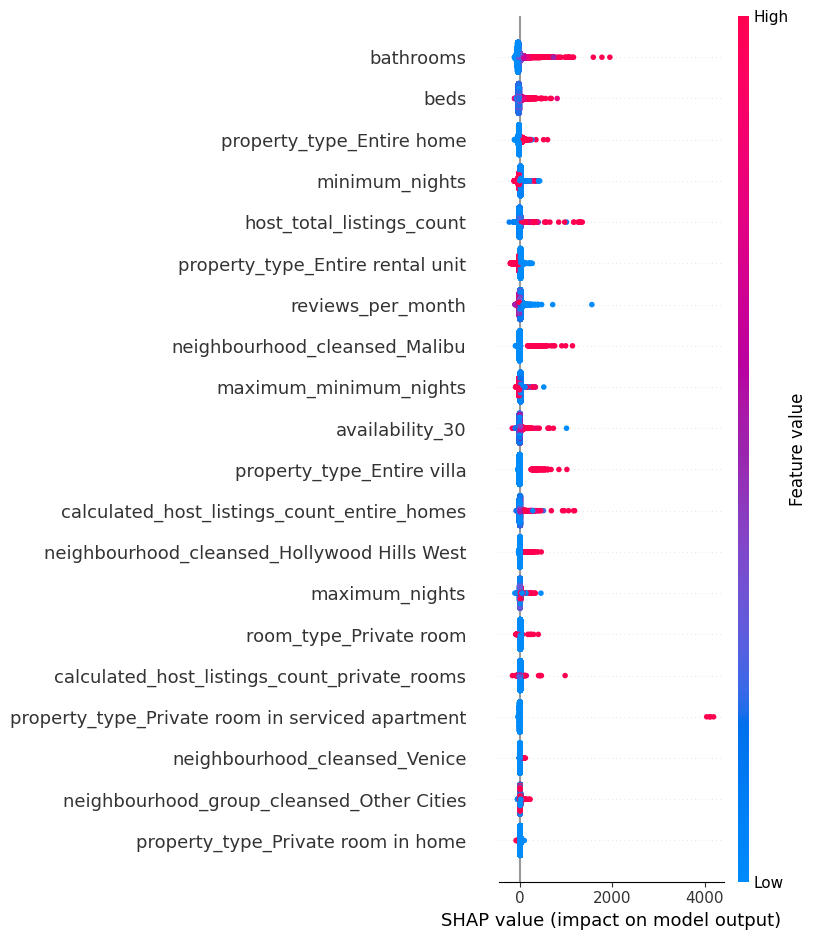

In [ ]:
import shap

explainer = shap.TreeExplainer(model_rf)
shap_values = explainer.shap_values(train_x)

shap.summary_plot(shap_values,train_x)

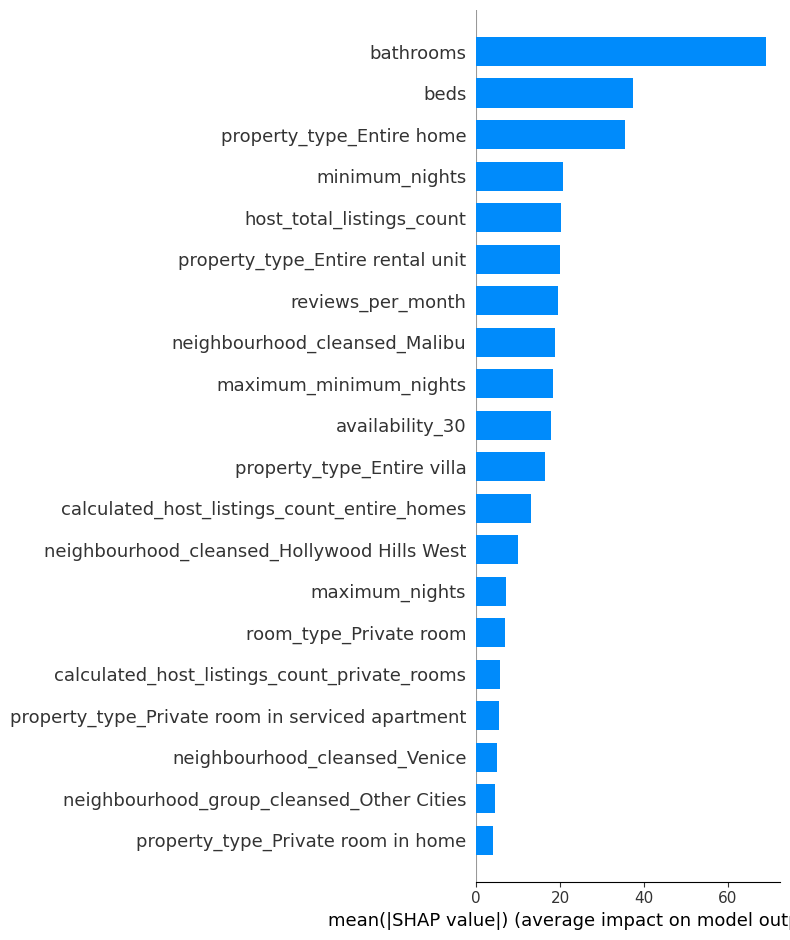

In [ ]:
shap.summary_plot(shap_values, train_x, plot_type="bar")

In [ ]:
top_10_importance

,Importance
bathrooms,14.780539
host_total_listings_count,10.542288
property_type_Private room in serviced apartment,9.567881
reviews_per_month,7.782032
calculated_host_listings_count_entire_homes,7.088218
beds,6.300725
availability_30,5.736699
property_type_Entire villa,3.917179
neighbourhood_cleansed_Malibu,3.721595
minimum_nights,3.288646


In [ ]:
from sklearn.inspection import PartialDependenceDisplay

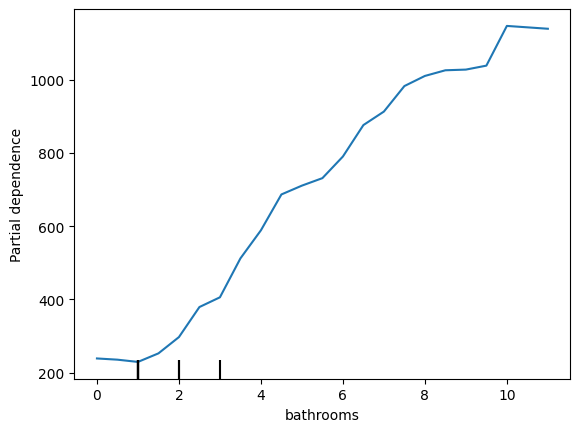

In [ ]:
features = ['bathrooms']

PartialDependenceDisplay.from_estimator(model_rf,train_x, features=features)
plt.show()

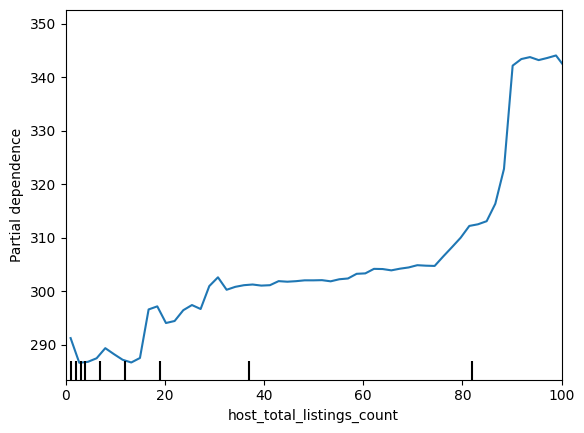

In [ ]:
features = ['host_total_listings_count']

PartialDependenceDisplay.from_estimator(model_rf,train_x, features=features)
plt.xlim(0, 100)
plt.show()

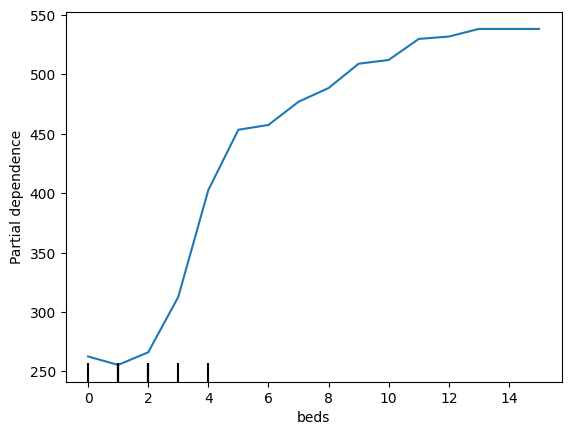

In [ ]:
features = ['beds']

PartialDependenceDisplay.from_estimator(model_rf,train_x, features=features)
plt.show()

# Price Classification

In [ ]:
## Price Classification (Instead of predicting price, we try to predict price category (Economy,Premium,and Luxury) next )

In [ ]:
def categorize_price(price):
    if 0 <= price < 100:
        return 'Economy'
    elif 100 <= price < 225:
        return 'Premium'
    else:
        return 'Luxury'

los_angeles_data['price_range'] = los_angeles_data['price'].apply(categorize_price)

In [ ]:
los_angeles_predictors = los_angeles_data[['host_total_listings_count',
                                                                'room_type',
                                                                'accommodates',
                                                                'neighbourhood_cleansed',
                                                                'property_type',
                                                                'neighbourhood_group_cleansed',
                                                                'bathrooms',
                                                                'bedrooms',
                                                                'beds',
                                                                'minimum_nights',
                                                                'maximum_nights',
                                                                'number_of_reviews',
                                                                'review_scores_rating',
                                                                'review_scores_accuracy',
                                                                'review_scores_cleanliness',
                                                                'review_scores_checkin',
                                                                'review_scores_communication',
                                                                'review_scores_location',
                                                                'review_scores_value',
                                                                'instant_bookable',
                                                                'calculated_host_listings_count',
                                                                'calculated_host_listings_count_entire_homes',
                                                                'calculated_host_listings_count_private_rooms',
                                                                'calculated_host_listings_count_shared_rooms',
                                                                'reviews_per_month',
                                                                'number_of_reviews_ltm',
                                                                'number_of_reviews_l30d'
                                                                ]]

#print(world_data_predictors.dtypes)

x_aligned = pd.get_dummies(los_angeles_predictors, drop_first=True)
#X
y_aligned = los_angeles_data['price_range']

# Split data into training and testing sets
train_x, valid_x, train_y, valid_y = train_test_split(x_aligned, y_aligned, test_size=0.75, random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_x)

train_x = scaler.transform(train_x)
valid_x = scaler.transform(valid_x)

# Initialize and train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train_x, train_y)

# Make predictions on the test set
y_pred = knn.predict(valid_x)

# Evaluate the model
print(classification_report(valid_y, y_pred))

cm2 = confusion_matrix(valid_y, y_pred)
print("Confusion Matrix:\n", cm2)

              precision    recall  f1-score   support

     Economy       0.63      0.59      0.61      1235
      Luxury       0.74      0.73      0.74      2839
     Premium       0.70      0.72      0.71      3695

    accuracy                           0.70      7769
   macro avg       0.69      0.68      0.69      7769
weighted avg       0.70      0.70      0.70      7769

Confusion Matrix:
 [[ 723   70  442]
 [  44 2076  719]
 [ 379  641 2675]]


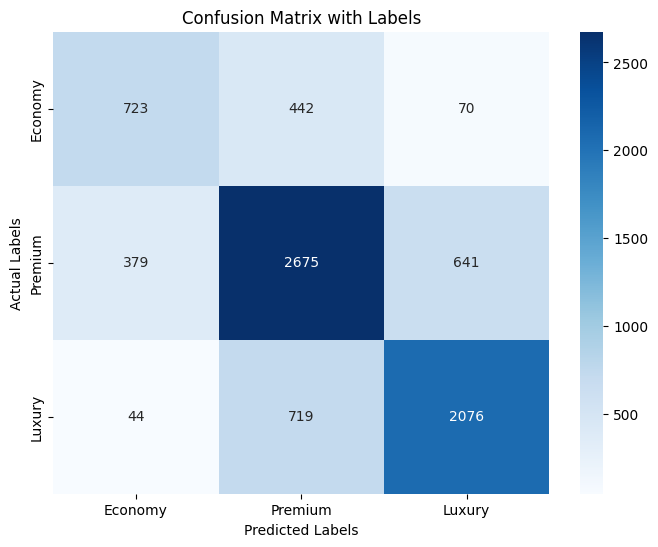

In [ ]:
from sklearn.metrics import confusion_matrix # Re-importing to ensure access to the function
import seaborn as sns
import matplotlib.pyplot as plt

actual = ['Economy', 'Premium', 'Luxury', 'Economy', 'Premium', 'Luxury', 'Economy', 'Premium']
predicted = ['Economy', 'Premium', 'Luxury', 'Economy', 'Premium', 'Luxury', 'Economy', 'Premium']

cm = confusion_matrix(valid_y, y_pred, labels=['Economy', 'Premium', 'Luxury'])

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues',
            xticklabels=['Economy', 'Premium', 'Luxury'],
            yticklabels=['Economy', 'Premium', 'Luxury'])
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix with Labels')
plt.show()

# Superhost Classifier

In [ ]:
## Superhost Classifier (Superhosts are a label provided by Airbnb to top hosts who offer the best hospitality services)

In [ ]:
# We use Logit regression to create probablity of a listing host being a superhost

In [ ]:
los_angeles_data['host_is_superhost'] = los_angeles_data['host_is_superhost'].replace({'t': 1, 'f': 0})

<ipython-input-106-9bc3b1a25907>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  los_angeles_data['host_is_superhost'] = los_angeles_data['host_is_superhost'].replace({'t': 1, 'f': 0})


In [ ]:
los_angeles_predictors = los_angeles_data[['price',
                                                                'host_total_listings_count',
                                                                'room_type',
                                                                'accommodates',
                                                                'neighbourhood_cleansed',
                                                                'property_type',
                                                                'neighbourhood_group_cleansed',
                                                                'bathrooms',
                                                                'bedrooms',
                                                                'beds',
                                                                'minimum_nights',
                                                                'maximum_nights',
                                                                'number_of_reviews',
                                                                'review_scores_rating',
                                                                'review_scores_accuracy',
                                                                'review_scores_cleanliness',
                                                                'review_scores_checkin',
                                                                'review_scores_communication',
                                                                'review_scores_location',
                                                                'review_scores_value',
                                                                'instant_bookable',
                                                                'calculated_host_listings_count',
                                                                'calculated_host_listings_count_entire_homes',
                                                                'calculated_host_listings_count_private_rooms',
                                                                'calculated_host_listings_count_shared_rooms',
                                                                'reviews_per_month',
                                                                'number_of_reviews_ltm',
                                                                'number_of_reviews_l30d'
                                                                ]]

#print(world_data_predictors.dtypes)

x_aligned = pd.get_dummies(los_angeles_predictors, drop_first=True)
#X
y_aligned = los_angeles_data['host_is_superhost']
#y

# Combine train_x and train_y into one DataFrame to ensure alignment after dropping NaNs
#combined_df = pd.concat([x, y], axis=1)
# Drop rows where any value is NaN (either in predictors or target)
#combined_df.dropna(inplace=True)

# Split back into predictors (x_aligned) and target (y_aligned)
#x_aligned = combined_df.drop('CO2 emissions (metric tons per capita)', axis=1)
#y_aligned = combined_df['CO2 emissions (metric tons per capita)']

train_x, valid_x, train_y, valid_y = train_test_split(x_aligned, y_aligned, test_size=0.25, random_state=1)

In [ ]:
lreg=sklm.LogisticRegression(solver='liblinear')
lreg.fit(train_x, train_y)

LogisticRegression(solver='liblinear')

In [ ]:
#get the predicted probabilities in training:
lreg_predict_prob_tr=lreg.predict_proba(valid_x)
lreg_predict_prob_tr[:5]

array([[0.45542568, 0.54457432],
       [0.27809071, 0.72190929],
       [0.27143962, 0.72856038],
       [0.26853215, 0.73146785],
       [0.41470763, 0.58529237]])

In [ ]:
#get the predicted values in training:
lreg_predictions_tr=lreg.predict(valid_x)
lreg_predictions_tr[:5]

array([1, 1, 1, 1, 1])

In [ ]:
# This is from DMBA book package
classificationSummary(valid_y, lreg_predictions_tr)

Confusion Matrix (Accuracy 0.6915)

       Prediction
Actual    0    1
     0  504  528
     1  271 1287


In [ ]:
# This is a utility from scikit
print("Classification Report:\n",classification_report(valid_y, lreg_predictions_tr))

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.49      0.56      1032
           1       0.71      0.83      0.76      1558

    accuracy                           0.69      2590
   macro avg       0.68      0.66      0.66      2590
weighted avg       0.69      0.69      0.68      2590



In [ ]:
## Find optimal cutoff for classifying a listing being hosted by a superhost

<ipython-input-121-d3bd325a5c04>:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', color='r')


Text(0, 0.5, 'True Positive Rate (Sensitivity)')

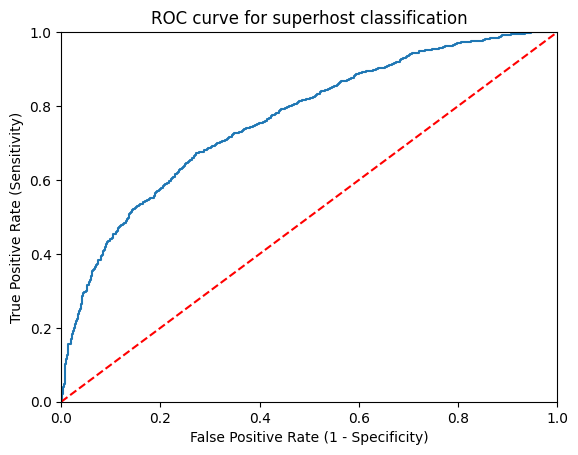

In [ ]:
#higher AUC indicates better classifier
# fpr, tpr, thresholds = roc_curve(train_y2, ypredclass_tr2)
fpr, tpr, thresholds = roc_curve(valid_y, lreg_predict_prob_tr[:,1])
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1], 'k--', color='r')
plt.title('ROC curve for superhost classification')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

In [ ]:
# find the index where tpr + (1-fpr) is maximum

fpr, tpr, thresholds = roc_curve(valid_y, lreg_predict_prob_tr[:,1])
optimal_idx = np.argmax(tpr + (1 - fpr))
optimal_threshold = thresholds[optimal_idx]
print(f"Optimal threshold: {optimal_threshold}")

Optimal threshold: 0.5988432637955595


In [ ]:
print("Optimal FPR:",fpr[optimal_idx])
print("Optimal TPR:",tpr[optimal_idx])

Optimal FPR: 0.27325581395348836
Optimal TPR: 0.6732991014120667


In [ ]:
## Optimal Threshoold Accuracy

In [ ]:
# Using optimal_threshold as cutoff
ypredclass_tr_Opt_Thrs = np.where(lreg_predict_prob_tr[:,1] > optimal_threshold, 1, 0)
cm2 = confusion_matrix(valid_y, ypredclass_tr_Opt_Thrs)
print("Confusion Matrix:\n", cm2)
print("\n")
print("Classification Report:\n",classification_report(valid_y, ypredclass_tr_Opt_Thrs))

Confusion Matrix:
 [[ 750  282]
 [ 510 1048]]


Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.73      0.65      1032
           1       0.79      0.67      0.73      1558

    accuracy                           0.69      2590
   macro avg       0.69      0.70      0.69      2590
weighted avg       0.71      0.69      0.70      2590



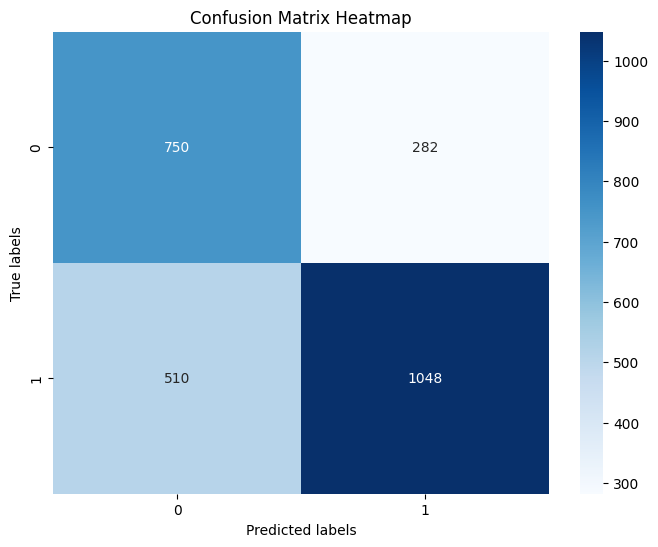

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm2, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [ ]:
logit_result_tr = pd.DataFrame({'actual': valid_y,
                             'p(0)': [p[0] for p in lreg_predict_prob_tr],
                             'p(1)': [p[1] for p in lreg_predict_prob_tr],
                             'predicted': ypredclass_tr_Opt_Thrs })

In [ ]:
logit_result_tr

,actual,p(0),p(1),predicted
3015,1,0.455426,0.544574,0
4591,1,0.278091,0.721909,1
6951,1,0.271440,0.728560,1
5779,1,0.268532,0.731468,1
2621,1,0.414708,0.585292,0
...,...,...,...,...
766,1,0.446202,0.553798,0
2027,0,0.171871,0.828129,1
9244,1,0.221660,0.778340,1
9822,0,0.744910,0.255090,0
